In [22]:
import numpy as np 
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

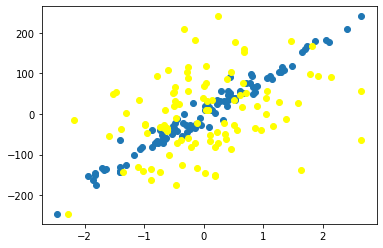

In [23]:
x,y = make_regression(n_samples=100 , n_features=2,noise =10)

plt.scatter(x[:,0],y)
plt.scatter(x[:,1],y,c='yellow')

In [30]:
#verification des dimension
print(x.shape)
print(y.shape)
y = y.reshape(y.shape[0],1)
y.shape

(100, 2)
(100, 1)


(100, 1)

In [31]:
#creation de la matrice X , inclut le Biais
X = np.hstack((x,np.ones((x.shape[0],1))))

print(X.shape)
print(X[:10])

(100, 3)
[[-0.29860784 -0.66971846  1.        ]
 [-0.22623887 -0.62331459  1.        ]
 [-1.71108922 -0.11887484  1.        ]
 [-0.04012634 -0.98315734  1.        ]
 [-0.1489956  -0.67117362  1.        ]
 [-0.23873848  0.50534308  1.        ]
 [-0.51203926  1.16983471  1.        ]
 [-1.03666857  0.19544661  1.        ]
 [ 0.52034906 -0.01301358  1.        ]
 [ 0.04002086 -0.64528506  1.        ]]


In [32]:
theta = np.random.randn(3,1)
theta

array([[ 0.11408295],
       [ 1.24952435],
       [-0.14521149]])

In [33]:
def model(X,theta):
    return X.dot(theta)

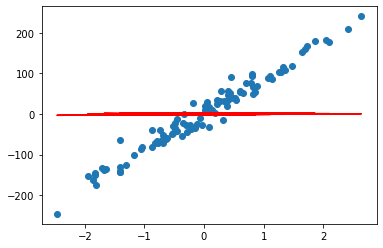

In [34]:
plt.scatter(x[:,0],y)
plt.plot(x[:,0],model(X,theta),c='r')

In [35]:
def cost_function(X,y,theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X,theta)-y)**2)

In [36]:
cost_function(X,y,theta)

4326.680928187185

In [37]:
def grad(X,y,theta):
    m = len(y)
    return 1/m *X.T.dot(model(X,theta)-y)

In [38]:
def gradient_descent(X,y,theta,learning_rate,n_iteration):
    cost_history = np.zeros(n_iteration)
    
    for i in range(0,n_iteration):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i]= cost_function(X,y,theta)
    return theta , cost_history

In [39]:
n_iteration =1000
learning_rate = 0.01
theta_final , cost_history = gradient_descent(X,y,theta,learning_rate,n_iteration)

In [40]:
theta_final

array([[85.12136456],
       [15.38905212],
       [ 1.33848326]])

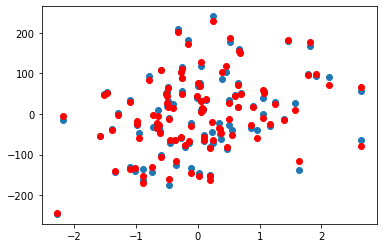

In [45]:
predictions = model(X, theta_final)

plt.scatter(x[:,1],y)
plt.scatter(x[:,1],predictions,c='r')

In [46]:
def coef_determination(y,pred):
    u = ((y-pred)**2).sum()
    v = ((y-y.mean())**2).sum()
    return 1- u/v

In [47]:
coef_determination(y,predictions)

0.9893162572281607

<IPython.core.display.Javascript object>


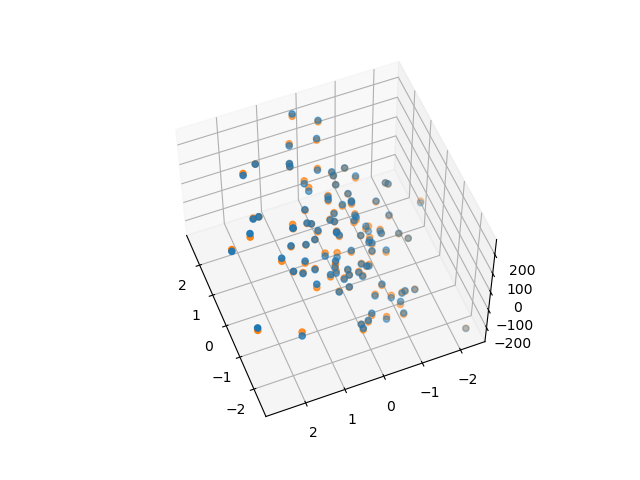

In [48]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.scatter(x[:,0],x[:,1],y)
ax.scatter(x[:,0],x[:,1],predictions)

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv("mtcars.csv")
data.head(10)

In [ ]:
y = data[['mpg']]
x = data[['hp','wt']]
y[:5] , x


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)


In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

In [ ]:
prediction=(model.predict(x_test))
print(model.predict(x_test))
print(y_test)

In [ ]:
model.predict([[3.1,120]])

In [ ]:
plt.figure(figsize=(12,7))
ax = plt.axes(projection='3d')
ax.scatter(x_test['hp'], x_test['wt'],y_test)
ax.scatter(x_test['hp'], x_test['wt'],prediction, c='r')
plt.show()
